<a href="https://colab.research.google.com/github/0xdany/konpyuta425/blob/main/assigment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CPSC425 Assigment
## Dany Raihan (53341608)
----

In [227]:
from PIL import Image
import numpy as np
import math
from scipy import signal
import cv2

In [228]:
# for Colab
from IPython.display import display

# Part 2: Gaussian Filtering


## Question 1

In [229]:
# boxfilter(n) returns a box filter of size n by n. n must be odd number and signaling an error if not. The return filter should be a Numpy array.
def boxfilter(n):
  isOdd = True if n%2==1 else False
  assert isOdd, "Dimension must be odd"
  return np.full((n,n), 1 / (n*n))


In [230]:
# show the results of your boxfilter(n) function for the cases n=3
boxfilter(3)

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [231]:
# show the results of your boxfilter(n) function for the cases n=4. Should return an AssertionError
try:
  boxfilter(4)
  assert True, "FAIL: SHOULD THROW ERROR"
except AssertionError as e:
  print("Error thrown as expected with the following message: ")
  print(e)

Error thrown as expected with the following message: 
Dimension must be odd


In [232]:
# show the results of your boxfilter(n) function for the cases n=5
boxfilter(5)

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

## Question 2

In [233]:
# gauss1d(sigma) returns a 1D Gaussian filter for a given value of sigma.
def gauss1d(sigma):
  len = math.ceil(6*sigma)
  len = len+1 if len%2==0 else len

  # get the middle index
  mid = len//2

  #
  arr = np.arange(-mid,mid+1)

  # apply filter
  filter = np.exp(-(arr*arr)/(2*sigma*sigma))

  # normalize
  filter = filter / np.sum(filter)

  return filter

In [234]:
# show the filter values produced for sigma values of 0.3
gauss1d(0.3)

array([0.00383626, 0.99232748, 0.00383626])

In [235]:
# show the filter values produced for sigma values of 0.5
gauss1d(0.5)

array([0.10650698, 0.78698604, 0.10650698])

In [236]:
# show the filter values produced for sigma values of 2
gauss1d(1)

array([0.00443305, 0.05400558, 0.24203623, 0.39905028, 0.24203623,
       0.05400558, 0.00443305])

In [237]:
# show the filter values produced for sigma values of 2
gauss1d(2)

array([0.0022182 , 0.00877313, 0.02702316, 0.06482519, 0.12110939,
       0.17621312, 0.19967563, 0.17621312, 0.12110939, 0.06482519,
       0.02702316, 0.00877313, 0.0022182 ])

## Question 3

In [238]:
# gauss2d(sigma)’ that returns a 2D Gaussian filter for a given value of sigma.
def gauss2d(sigma):
   gauss1d_arr = gauss1d(sigma)
   gauss1d_2d =  gauss1d_arr[np.newaxis,:]
   gauss1d_2d_T = gauss1d_arr[:,np.newaxis]

   return signal.convolve2d(gauss1d_2d, gauss1d_2d_T)

In [239]:
# Show the 2D Gaussian filter for sigma values of 0.5.
res = gauss2d(0.5)
res

array([[0.01134374, 0.08381951, 0.01134374],
       [0.08381951, 0.61934703, 0.08381951],
       [0.01134374, 0.08381951, 0.01134374]])

In [240]:
# Show the 2D Gaussian filter for sigma values of 1.
res = gauss2d(1)
res

array([[1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [1.76900911e-03, 2.15509428e-02, 9.65846250e-02, 1.59241126e-01,
        9.65846250e-02, 2.15509428e-02, 1.76900911e-03],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05]])

## Question 4

(a) Write a function ‘convolve2d_manual(array, filter)’ that takes in an image (stored in `array`) and a filter, and performs convolution to the image with zero paddings (thus, the image sizes of input and output are the same).

In [241]:
def convolve2d_manual(array, filter):
  im_height, im_width = array.shape
  filter_height, filter_width = filter.shape

  pad_height = filter_height // 2
  pad_width = filter_width // 2

  # add zero padding with the size of width and height of given filter
  im_padded = np.pad(array, ((pad_height, pad_height), (pad_width, pad_width)))

  # create a zeros matrix with the same shape as input array
  res = np.full((im_height, im_width), 0, dtype=np.float32)

  # rotate the filter 180 in order to do convolution (a.k.a rotate it 90 degree tiwce)
  rotated_filter =  np.rot90(filter, 2)

  for y in range(im_height):
    for x in range(im_width):
      neighbor = im_padded[y:y+filter_height, x:x+filter_width]
      res[y, x] = np.sum(neighbor * rotated_filter)

  return res

(b) Write a function ‘gaussconvolve2d_manual(array,sigma)’ that applies Gaussian convolution to a 2D array for the given value of sigma. The result should be a 2D array.

In [242]:
# gaussconvolve2d_manual(array,sigma) applies Gaussian convolution to a 2D array for the given value of sigma
def gaussconvolve2d_manual(array,sigma):
  gauss2d_filter = gauss2d(sigma)
  return convolve2d_manual(array, gauss2d_filter)

(c) Apply your ‘gaussconvolve2d_manual’ with a sigma of 3 on the image of the dog.

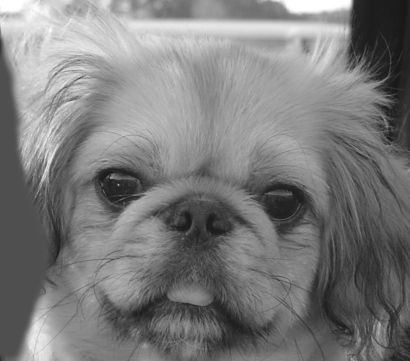

In [243]:
# load the dog image
dog_im = Image.open('dog.jpg')
dog_im_grayscale = dog_im.convert('L')
dog_im_grayscale

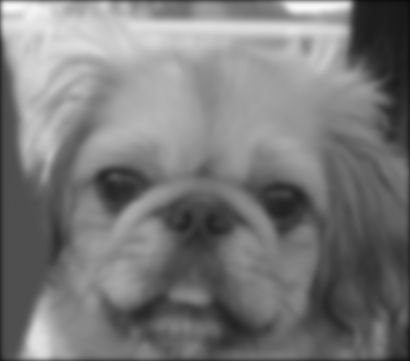

In [244]:
# Apply your ‘gaussconvolve2d_manual’ with a sigma of 3 on the image of the dog
dog_arr = np.asarray(dog_im_grayscale, dtype=np.float32)
dog_arr_gaussed = gaussconvolve2d_manual(dog_arr, 3)
dog_arr_gaussed_uint = dog_arr_gaussed.clip(0,255).astype(np.uint8)
dog_im_gaussed = Image.fromarray(dog_arr_gaussed_uint)
dog_im_gaussed

(d) Use PIL to show both the original and filtered images.

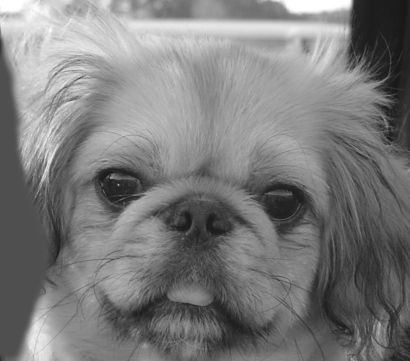

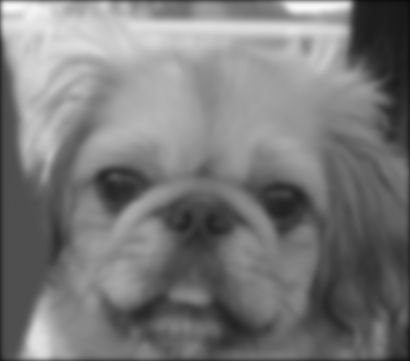

In [245]:
display(dog_im_grayscale, dog_im_gaussed)

## Question 5

(a) Write a function ‘gaussconvolve2d_scipy(array,sigma)’ that applies Gaussian convolution to a 2D array for the given value of sigma. The result should be a 2D array. Do this by first generating a filter with your ‘gauss2d’, and then applying it to the array with signal.convolve2d(array,filter,'same'). The ‘same’ option makes the result the same size as the image.



In [246]:
def gaussconvolve2d_scipy(array,sigma):
  gauss2d_filter = gauss2d(sigma)
  return signal.convolve2d(array,gauss2d_filter,'same')

(b) Apply your ‘gaussconvolve2d_scipy’ with a sigma of 3 on the image of the dog again. Follow instructions in part 4c for saving and loading the image.

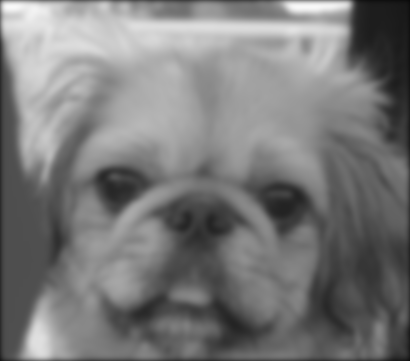

In [247]:
dog_arr_gaussed_spicy = gaussconvolve2d_scipy(dog_arr, 3)
dog_arr_gaussed_spicy
dog_arr_gaussed_spicy_uint = dog_arr_gaussed_spicy.clip(0,255).astype(np.uint8)
dog_im_gaussed_spicy = Image.fromarray(dog_arr_gaussed_spicy_uint)
dog_im_gaussed_spicy

(c) Use PIL to show both the original and filtered images.

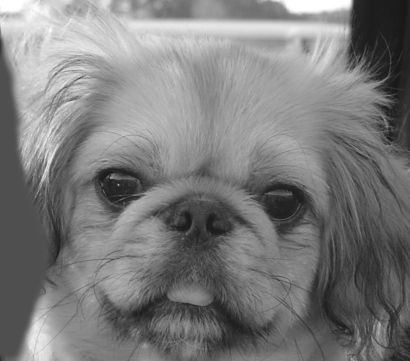

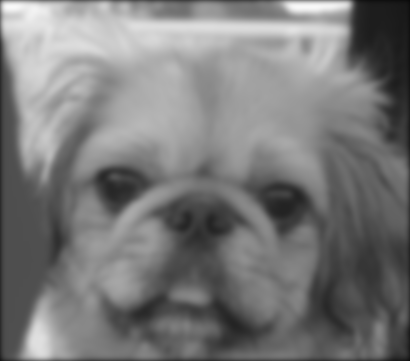

In [248]:
display(dog_im_grayscale, dog_im_gaussed_spicy)

## Question 6

Experiment on how much time it takes to convolve the dog image above using your convolution implementation ‘gaussconvolve2d_manual’ and the scipy implementation ‘gaussconvolve2d’. Compare and comment on the performance using a sigma of 10.0.

In [249]:
import time

t1 = time.time()
gaussconvolve2d_manual(dog_arr, 10.0) # test on gaussconvolve2d_manual
duration_manual = time.time() - t1

t1 = time.time()
gaussconvolve2d_scipy(dog_arr, 10.0) # test on gaussconvolve2d_spicy
duration_scipy = time.time() - t1

print(f'gaussconvolve2Td_manual(dog_arr, 10.0) takes {duration_manual} s.')
print(f'gaussconvolve2d_scipy(dog_arr, 10.0) takes {duration_scipy} s.')

print(f'gaussconvolve2d_scipy is {duration_manual/duration_scipy * 100}% faster than gaussconvolve2d_manual.')

gaussconvolve2Td_manual(dog_arr, 10.0) takes 2.340700387954712 s.
gaussconvolve2d_scipy(dog_arr, 10.0) takes 1.5290451049804688 s.
gaussconvolve2d_scipy is 153.0824944490183% faster than gaussconvolve2d_manual.


**comment** : The `gaussconvolve2d_manual` is slower, and argueably less efficient, than `gaussconvolve2d_scipy` due to their differences in the implementation. `gaussconvolve2d_manual` runs with a time complexity of O(n^2) where `n` is the number of pixel in an image, while, according to the documentation, `gaussconvolve2d_scipy` implementation runs with a time complexity of O(n*log(n)) by laveraging methods like the Fast Fourier Transform.

## Question 7

**Answer:** Given that 2D Gaussian filter is separable, made out of multiplying two 1D Gaussian filters, we can break down the convolution process into two steps. The first step is to convolve the image along the horizontal pixels and the second step is to convolve the image along the vertical pixels. This process helps us to avoid using nested loops and instead perform the convolution in `O(2n)`.

# Part 3: Hybrid Images

## Question 1

In [250]:
# load the image and seperate the color channel for the low-pass image
merilyn_im = Image.open('/content/2b_marilyn.bmp')
merilyn_arr = np.asarray(merilyn_im, dtype=np.float32)

merilyn_arr_red = merilyn_arr[:,:,0]
merilyn_arr_green = merilyn_arr[:,:,1]
merilyn_arr_blue = merilyn_arr[:,:,2]

In [251]:
sigma = 2.5

merilyn_arr_red_gaussed = gaussconvolve2d_manual(merilyn_arr_red, sigma)
merilyn_arr_green_gaussed = gaussconvolve2d_manual(merilyn_arr_green, sigma)
merilyn_arr_blue_gaussed = gaussconvolve2d_manual(merilyn_arr_blue, sigma)


array([[[ 63,  63,  63],
        [ 79,  79,  79],
        [ 91,  91,  91],
        ...,
        [ 98,  98,  98],
        [ 85,  85,  85],
        [ 67,  67,  67]],

       [[ 79,  79,  79],
        [ 99,  99,  99],
        [114, 114, 114],
        ...,
        [123, 123, 123],
        [106, 106, 106],
        [ 85,  85,  85]],

       [[ 91,  91,  91],
        [115, 115, 115],
        [133, 133, 133],
        ...,
        [143, 143, 143],
        [123, 123, 123],
        [ 98,  98,  98]],

       ...,

       [[103, 103, 103],
        [130, 130, 130],
        [150, 150, 150],
        ...,
        [111, 111, 111],
        [ 94,  94,  94],
        [ 75,  75,  75]],

       [[ 89,  89,  89],
        [112, 112, 112],
        [130, 130, 130],
        ...,
        [ 97,  97,  97],
        [ 82,  82,  82],
        [ 65,  65,  65]],

       [[ 71,  71,  71],
        [ 89,  89,  89],
        [103, 103, 103],
        ...,
        [ 78,  78,  78],
        [ 66,  66,  66],
        [ 52,  52,  52]]], dtype=uint8)
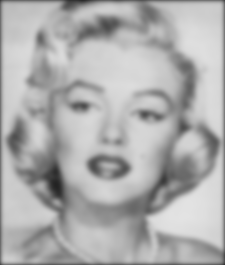

In [252]:
merilyn_arr_gaussed = np.stack((merilyn_arr_red_gaussed, merilyn_arr_green_gaussed, merilyn_arr_blue_gaussed), axis=-1)
merilyn_arr_lowpass_uint8 = np.clip(merilyn_arr_gaussed, 0, 255).astype(np.uint8)
merilyn_arr_lowpass_uint8


## Question 2

In [253]:
# load the image and seperate the color channel for the high-pass image
einstein_im = Image.open('/content/2a_einstein.bmp')
einstein_arr = np.asarray(einstein_im, dtype=np.float32)

einstein_arr_red = einstein_arr[:,:,0]
einstein_arr_green = einstein_arr[:,:,1]
einstein_arr_blue = einstein_arr[:,:,2]

In [254]:
einstein_arr_red_gaussed = gaussconvolve2d_manual(einstein_arr_red, sigma)
einstein_arr_green_gaussed = gaussconvolve2d_manual(einstein_arr_green, sigma)
einstein_arr_blue_gaussed = gaussconvolve2d_manual(einstein_arr_blue, sigma)

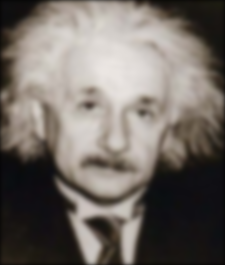

In [255]:
einstein_arr_gaussed = np.stack((einstein_arr_red_gaussed, einstein_arr_green_gaussed, einstein_arr_blue_gaussed), axis=-1)
einstein_arr_gaussed_uint8 = np.clip(einstein_arr_gaussed, 0, 255).astype(np.uint8)

Image.fromarray(einstein_arr_gaussed_uint8)

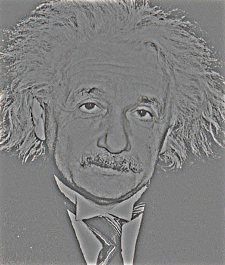

In [256]:
einstein_arr_red_highpass = einstein_arr[:,:,0] - einstein_arr_red_gaussed + 128
einstein_arr_green_highpass  = einstein_arr[:,:,1] -einstein_arr_green_gaussed +128
einstein_arr_blue_highpass  = einstein_arr[:,:,2] - einstein_arr_blue_gaussed  +128

einstein_arr_highpass = np.stack((einstein_arr_red_highpass, einstein_arr_green_highpass, einstein_arr_blue_highpass), axis=-1)
einstein_arr_highpass_uint8 = einstein_arr_highpass.clip(0, 255).astype(np.uint8)

Image.fromarray(einstein_arr_highpass_uint8)

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 7,  2,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [27, 26, 23],
        [11,  9,  6],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 5,  8,  4],
        [28, 24, 18],
        ...,
        [51, 50, 42],
        [26, 25, 19],
        [ 1,  0,  0]],

       ...,

       [[29, 20, 11],
        [53, 44, 35],
        [62, 53, 44],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[14,  5,  0],
        [35, 26, 17],
        [42, 33, 24],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [23, 15,  8],
        [37, 28, 20],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)
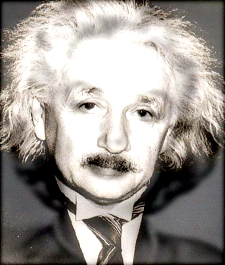

In [257]:
merged_arr_red = merilyn_arr_red_gaussed + einstein_arr_red -128
merged_arr_green = merilyn_arr_green_gaussed + einstein_arr_green  -128
merged_arr_blue = merilyn_arr_blue_gaussed + einstein_arr_blue  -128

merged_arr = np.stack((merged_arr_red, merged_arr_green, merged_arr_blue), axis=-1)
merged_arr_uint8 = merged_arr.clip(0,255).astype(np.uint8)
merged_arr_uint8

I have decided to create a function to create a hybrid image from two image with the implementation as follow

In [258]:
def merge_images(image1_path: str, image2_path: str, sigma: float):
    # Load and process the first image (low-pass filtering)
    image1 = Image.open(image1_path)
    image1_arr = np.asarray(image1, dtype=np.float32)

    # Separate the color channels for the first image
    image1_arr_red = image1_arr[:, :, 0]
    image1_arr_green = image1_arr[:, :, 1]
    image1_arr_blue = image1_arr[:, :, 2]

    image1_arr_red_gaussed = gaussconvolve2d_manual(image1_arr_red, sigma)
    image1_arr_green_gaussed = gaussconvolve2d_manual(image1_arr_green, sigma)
    image1_arr_blue_gaussed = gaussconvolve2d_manual(image1_arr_blue, sigma)

    image1_gaussed = np.stack((image1_arr_red_gaussed, image1_arr_green_gaussed, image1_arr_blue_gaussed), axis=-1)
    image1_gaussed_uint8 = np.clip(image1_gaussed, 0, 255).astype(np.uint8)

    image2 = Image.open(image2_path)
    image2_arr = np.asarray(image2, dtype=np.float32)

    image2_arr_red = image2_arr[:, :, 0]
    image2_arr_green = image2_arr[:, :, 1]
    image2_arr_blue = image2_arr[:, :, 2]

    image2_arr_red_gaussed = gaussconvolve2d_manual(image2_arr_red, sigma)
    image2_arr_green_gaussed = gaussconvolve2d_manual(image2_arr_green, sigma)
    image2_arr_blue_gaussed = gaussconvolve2d_manual(image2_arr_blue, sigma)

    image2_arr_red_highpass = image2_arr_red - image2_arr_red_gaussed
    image2_arr_green_highpass = image2_arr_green - image2_arr_green_gaussed
    image2_arr_blue_highpass = image2_arr_blue - image2_arr_blue_gaussed

    # Add the low-pass and high-pass images together (merging them)
    merged_arr_red = image1_arr_red_gaussed + image2_arr_red_highpass
    merged_arr_green = image1_arr_green_gaussed + image2_arr_green_highpass
    merged_arr_blue = image1_arr_blue_gaussed + image2_arr_blue_highpass

    merged_image_np = np.stack((merged_arr_red, merged_arr_green, merged_arr_blue), axis=-1)

    # Clip values to the valid range and convert back to uint8
    merged_image_np_uint8 = np.clip(merged_image_np, 0, 255).astype(np.uint8)

    return merged_image_np_uint8



array([[[ 74,  75,  80],
        [ 85,  90,  85],
        [109, 105, 102],
        ...,
        [116, 112, 108],
        [104,  99,  92],
        [ 95,  88,  77]],

       [[ 87,  87,  95],
        [103, 108, 104],
        [107, 105, 100],
        ...,
        [131, 131, 133],
        [118, 117, 119],
        [103, 103, 104]],

       [[ 95,  97, 103],
        [118, 121, 117],
        [138, 135, 128],
        ...,
        [151, 151, 150],
        [130, 130, 130],
        [111, 110, 111]],

       ...,

       [[131, 126, 121],
        [147, 143, 139],
        [151, 149, 146],
        ...,
        [103, 102, 100],
        [101,  99,  97],
        [ 89,  87,  85]],

       [[119, 114, 109],
        [134, 129, 125],
        [136, 132, 129],
        ...,
        [ 95,  93,  91],
        [ 97,  95,  93],
        [ 77,  75,  73]],

       [[ 94,  90,  88],
        [129, 124, 121],
        [139, 135, 131],
        ...,
        [ 88,  86,  84],
        [ 80,  78,  76],
        [ 71,  69,  67]]], dtype=uint8)
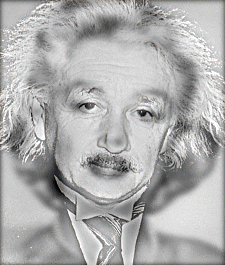

In [259]:
merge_images("/content/2b_marilyn.bmp", "/content/2a_einstein.bmp", 2.7)

array([[[ 16,  81, 108],
        [ 15,  85, 108],
        [ 19,  83, 110],
        ...,
        [ 30, 131, 165],
        [ 29, 131, 158],
        [ 19, 121, 165]],

       [[ 19,  84, 107],
        [ 16,  83, 119],
        [ 24,  85, 122],
        ...,
        [ 32, 135, 167],
        [ 32, 128, 172],
        [ 34, 130, 161]],

       [[ 16,  84, 115],
        [ 16,  86, 120],
        [ 28,  93, 128],
        ...,
        [ 36, 137, 173],
        [ 33, 132, 169],
        [ 36, 131, 169]],

       ...,

       [[ 18,  42,  54],
        [ 16,  39,  63],
        [ 12,  51,  59],
        ...,
        [ 14,  73,  72],
        [ 11,  67,  74],
        [ 14,  75,  69]],

       [[ 13,  42,  50],
        [ 12,  42,  57],
        [ 14,  40,  61],
        ...,
        [ 12,  64,  73],
        [ 15,  67,  68],
        [ 14,  73,  73]],

       [[ 11,  41,  53],
        [  9,  40,  53],
        [ 16,  41,  50],
        ...,
        [  8,  65,  72],
        [ 16,  72,  68],
        [ 14,  78,  67]]], dtype=uint8)
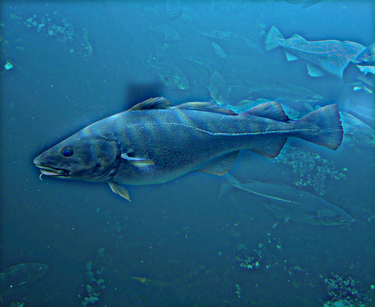

In [260]:
merge_images("/content/3b_submarine.bmp","/content/3a_fish.bmp", 4)

array([[[120, 136, 158],
        [121, 136, 156],
        [121, 136, 157],
        ...,
        [121, 136, 157],
        [121, 136, 156],
        [121, 136, 159]],

       [[121, 136, 156],
        [122, 135, 154],
        [122, 135, 155],
        ...,
        [122, 135, 155],
        [122, 135, 154],
        [121, 136, 156]],

       [[121, 136, 157],
        [122, 135, 155],
        [121, 136, 156],
        ...,
        [121, 135, 156],
        [122, 135, 155],
        [121, 136, 157]],

       ...,

       [[123, 138, 159],
        [123, 137, 156],
        [123, 137, 157],
        ...,
        [124, 138, 157],
        [124, 137, 156],
        [123, 138, 159]],

       [[123, 137, 158],
        [124, 137, 155],
        [123, 137, 156],
        ...,
        [124, 137, 156],
        [124, 137, 155],
        [123, 138, 158]],

       [[123, 138, 160],
        [124, 137, 157],
        [123, 138, 159],
        ...,
        [124, 138, 159],
        [124, 138, 157],
        [123, 139, 160]]], dtype=uint8)
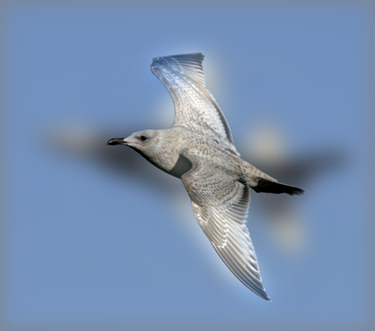

In [261]:
merge_images("/content/4b_plane.bmp", "/content/4a_bird.bmp", 11)

# Part 4: Playing with Different Denoising Filters

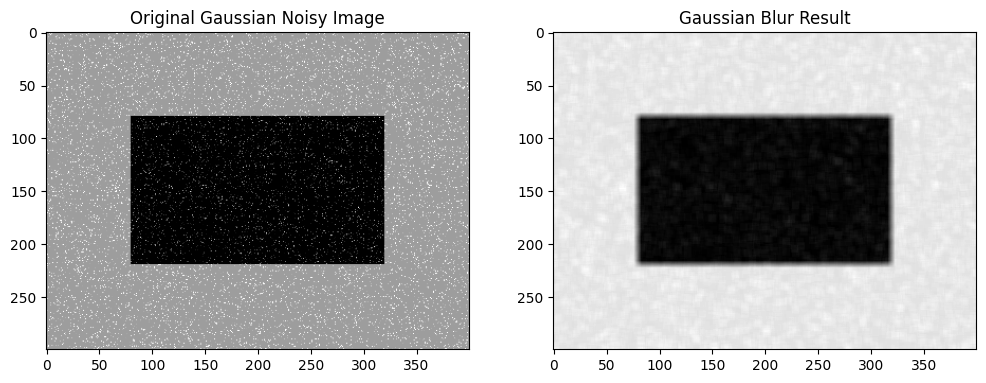

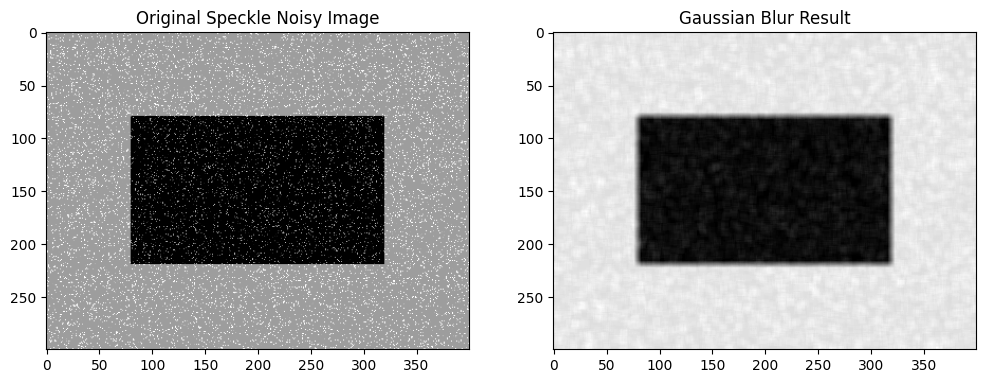

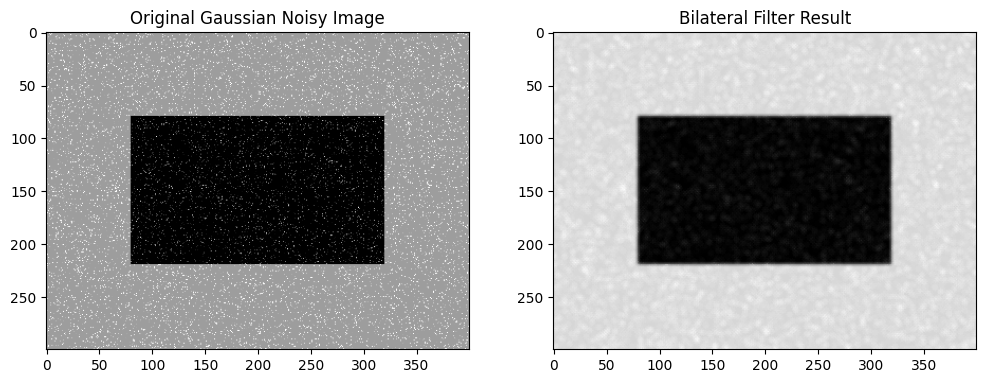

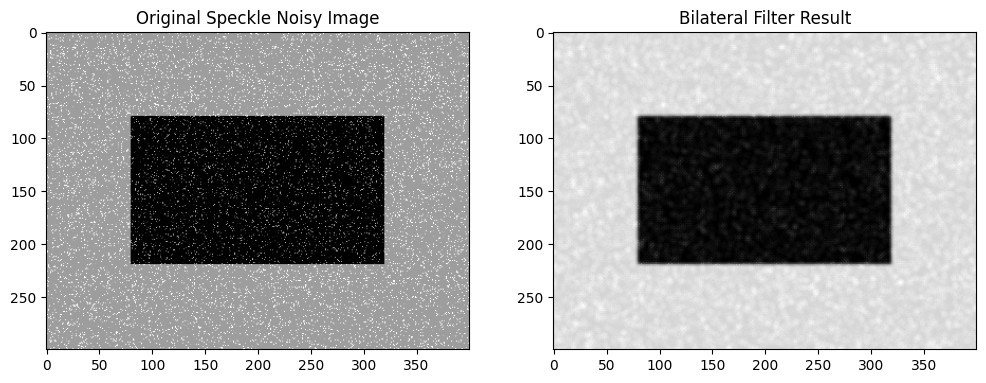

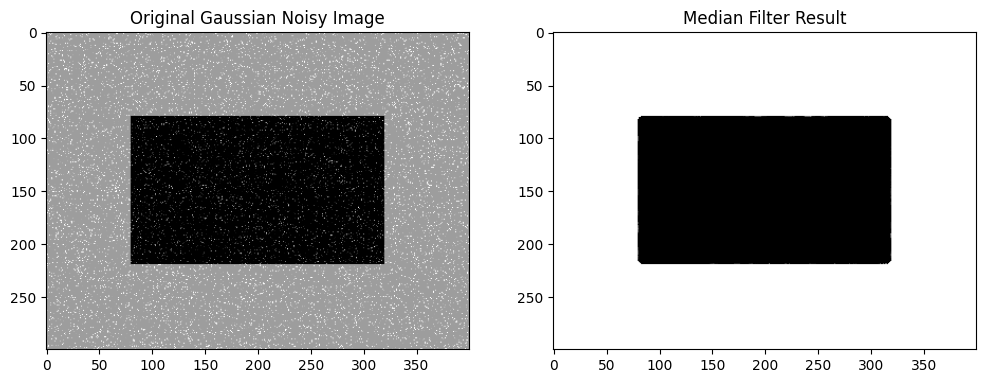

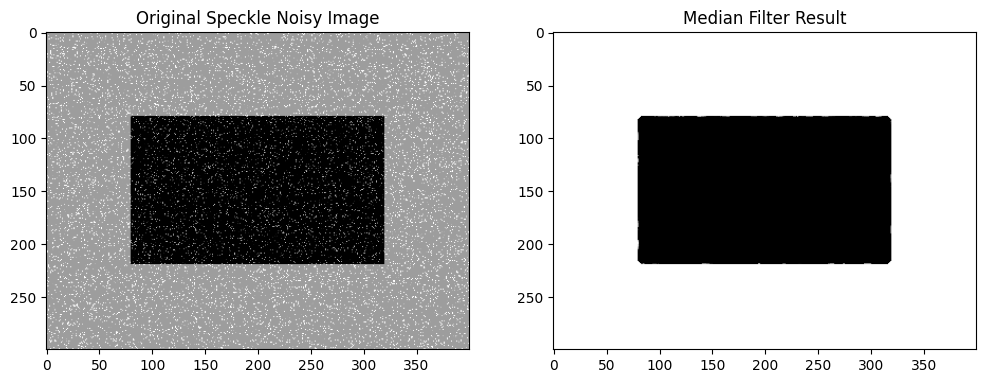

In [262]:
import matplotlib.pyplot as plt #this libraby is for displaying the images untuitively, inspired from "https://stackoverflow.com/questions/41793931/plotting-images-side-by-side-using-matplotlib"

# load the images
box_gauss = np.asarray(Image.open('/content/box_gauss.png'))
box_speckle = np.asarray(Image.open('/content/box_speckle.png'))

# apply Gaussian Blur
gaussian_blur_gauss = cv2.GaussianBlur(box_gauss, ksize=(7, 7), sigmaX=50).astype(np.uint8)
gaussian_blur_speckle = cv2.GaussianBlur(box_speckle, ksize=(7, 7), sigmaX=50).astype(np.uint8)

# apply Bilateral Filter
bilateral_filter_gauss = cv2.bilateralFilter(box_gauss, d=7, sigmaColor=150, sigmaSpace=150).astype(np.uint8)
bilateral_filter_speckle = cv2.bilateralFilter(box_speckle, d=7, sigmaColor=150, sigmaSpace=150).astype(np.uint8)

# apply Median Filter
median_blur_gauss = cv2.medianBlur(box_gauss, ksize=7).astype(np.uint8)
median_blur_speckle = cv2.medianBlur(box_speckle, ksize=7).astype(np.uint8)

# plotting function to display the images
def plot_images(original, filtered, title1, title2):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title(title1)
    plt.subplot(1, 2, 2)
    plt.imshow(filtered, cmap='gray')
    plt.title(title2)
    plt.show()

# display results
plot_images(box_gauss, gaussian_blur_gauss, "Original Gaussian Noisy Image", "Gaussian Blur Result")
plot_images(box_speckle, gaussian_blur_speckle, "Original Speckle Noisy Image", "Gaussian Blur Result")
plot_images(box_gauss, bilateral_filter_gauss, "Original Gaussian Noisy Image", "Bilateral Filter Result")
plot_images(box_speckle, bilateral_filter_speckle, "Original Speckle Noisy Image", "Bilateral Filter Result")
plot_images(box_gauss, median_blur_gauss, "Original Gaussian Noisy Image", "Median Filter Result")
plot_images(box_speckle, median_blur_speckle, "Original Speckle Noisy Image", "Median Filter Result")


**Comment:** When applying Gaussian, Bilateral, and Median filters to denoise images with Gaussian and speckle noise, each filter showed different strengths and weaknesses. The Gaussian filter was good at reducing noise, but it also blurred the edges, which caused some loss of important details in the image. The Bilateral filter did a better job at keeping the edges sharp while still reducing the noise, making it great for images where preserving detail is important, although it was a bit slower to run. The Median filter worked really well for removing speckle noise, like grainy noise, but it sometimes made smooth areas look a bit distorted, especially with larger kernel sizes.